In [1]:
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ROSMAP_PATH = 'ROSMAP_clinical.csv'
CT_COUNTS_META_PATH = 'ct_counts_public_meta.h5ad'

ROSMAP_data = pd.read_csv(ROSMAP_PATH)
ct_counts_metadata: ad.AnnData = ad.read_h5ad(CT_COUNTS_META_PATH)

ROSMAP_data = ROSMAP_data.convert_dtypes()
ct_counts_metadata.obs = ct_counts_metadata.obs.convert_dtypes()

In [2]:
ct_counts_metadata

AnnData object with n_obs × n_vars = 427 × 54
    obs: 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID', 'projid'

/home/jacob/Documents/BEP/bsc-thesis-scripts/norm_plots.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/jacob/Documents/BEP/bsc-thesis-scripts/norm_plots.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/jacob/Documents/BEP/bsc-thesis-scripts/norm_plots.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/jacob/Documents/BEP/bsc-thesis-scripts/norm_plots.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/jacob/Documents/BEP/bsc-thesis-scripts/norm_plots.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


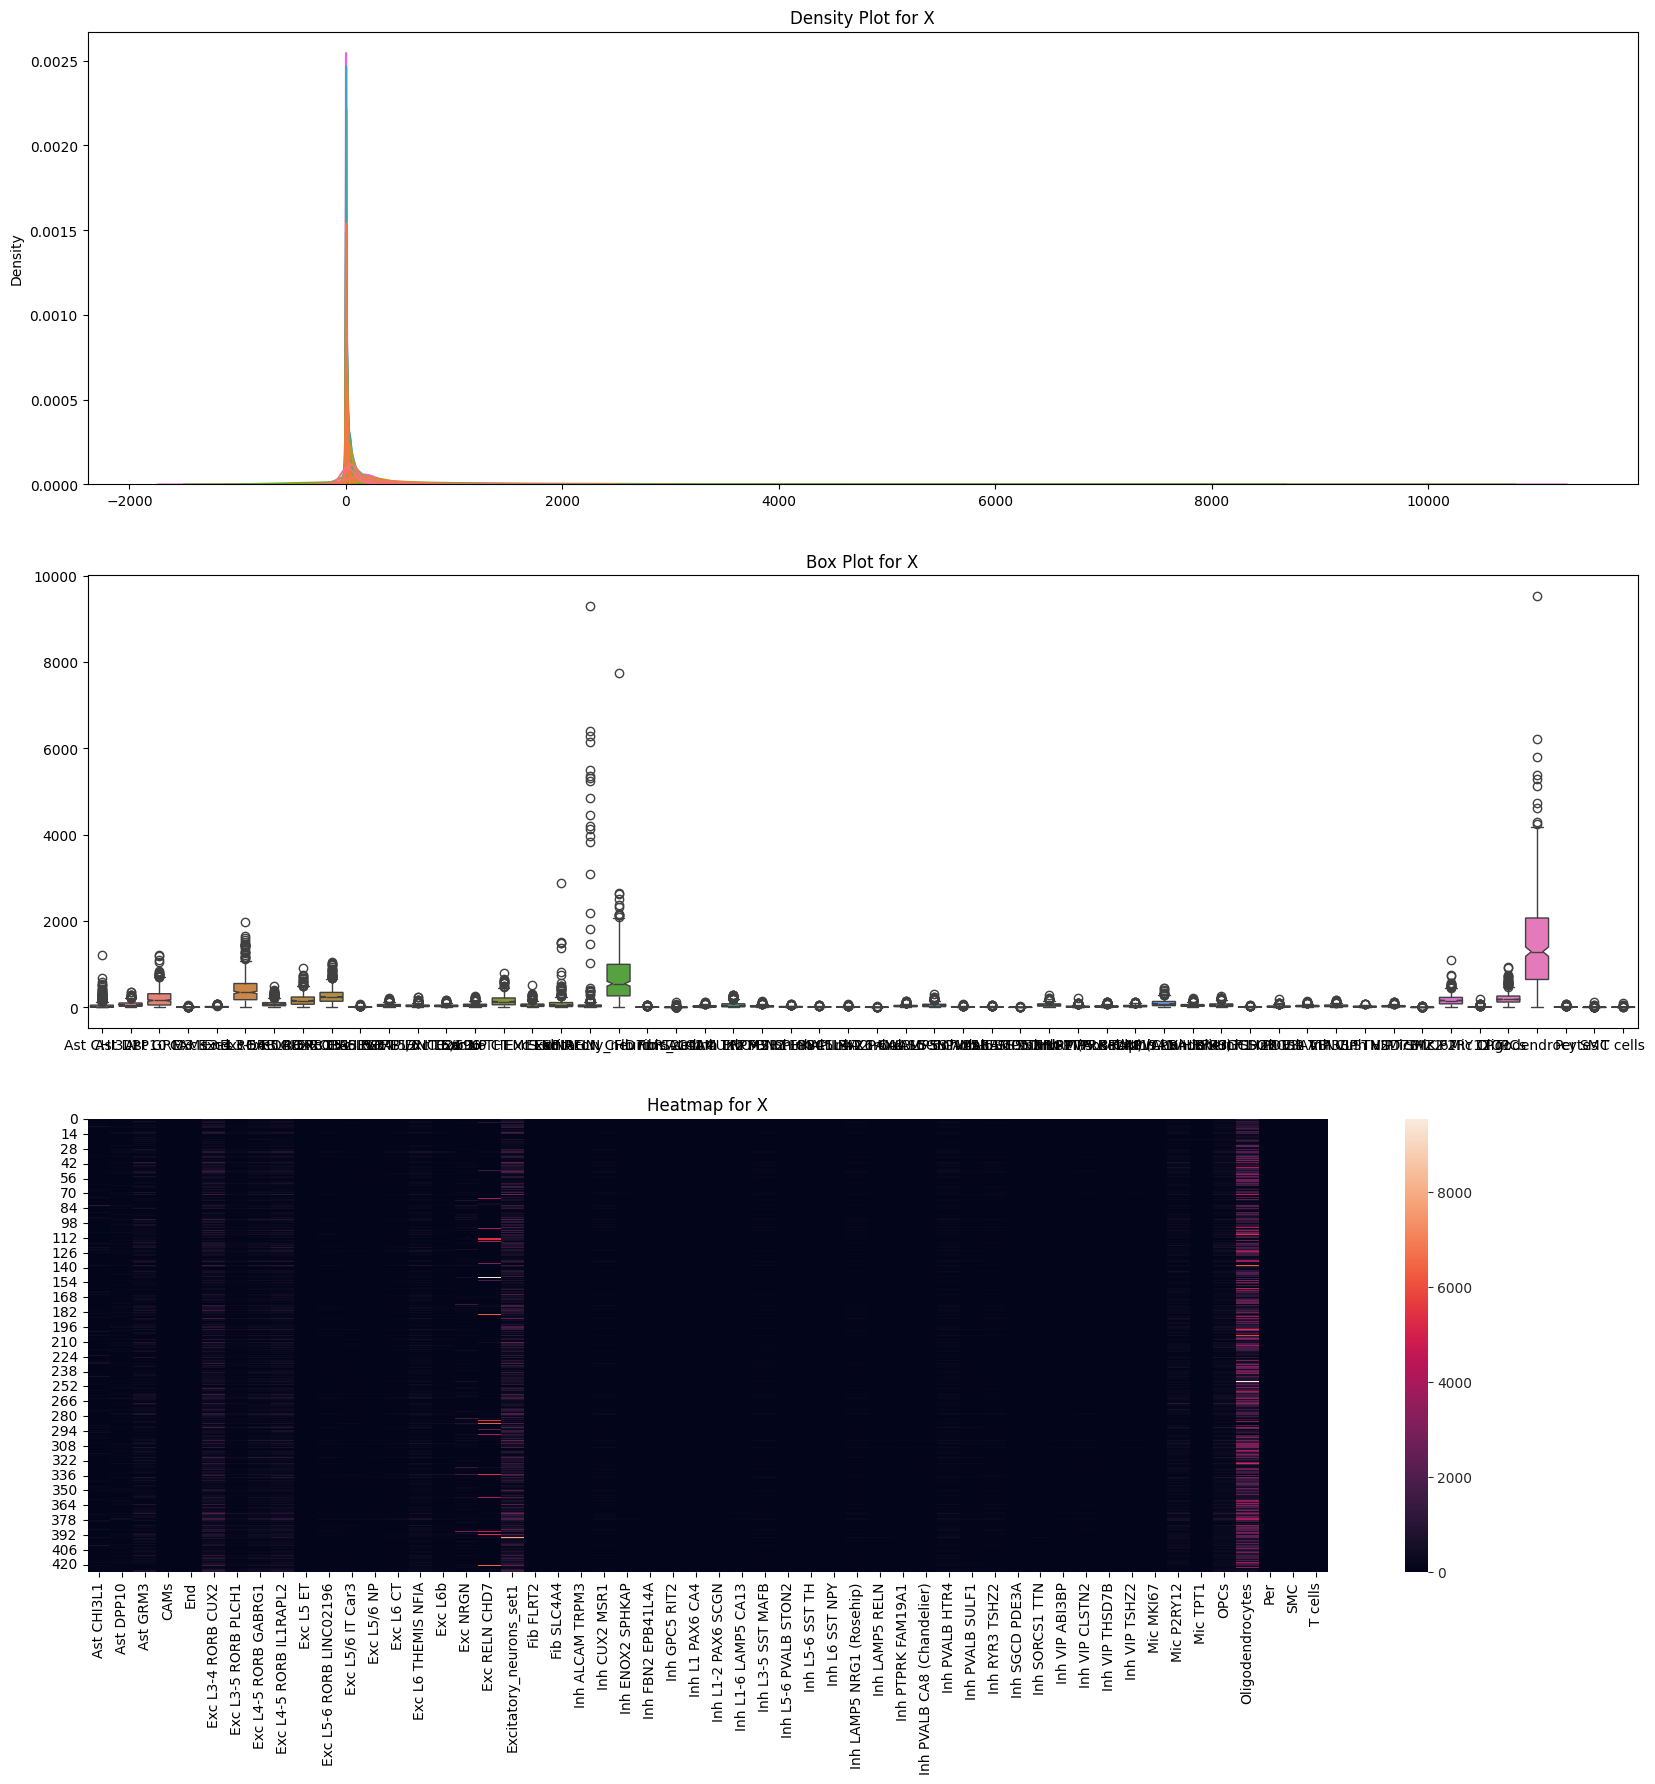

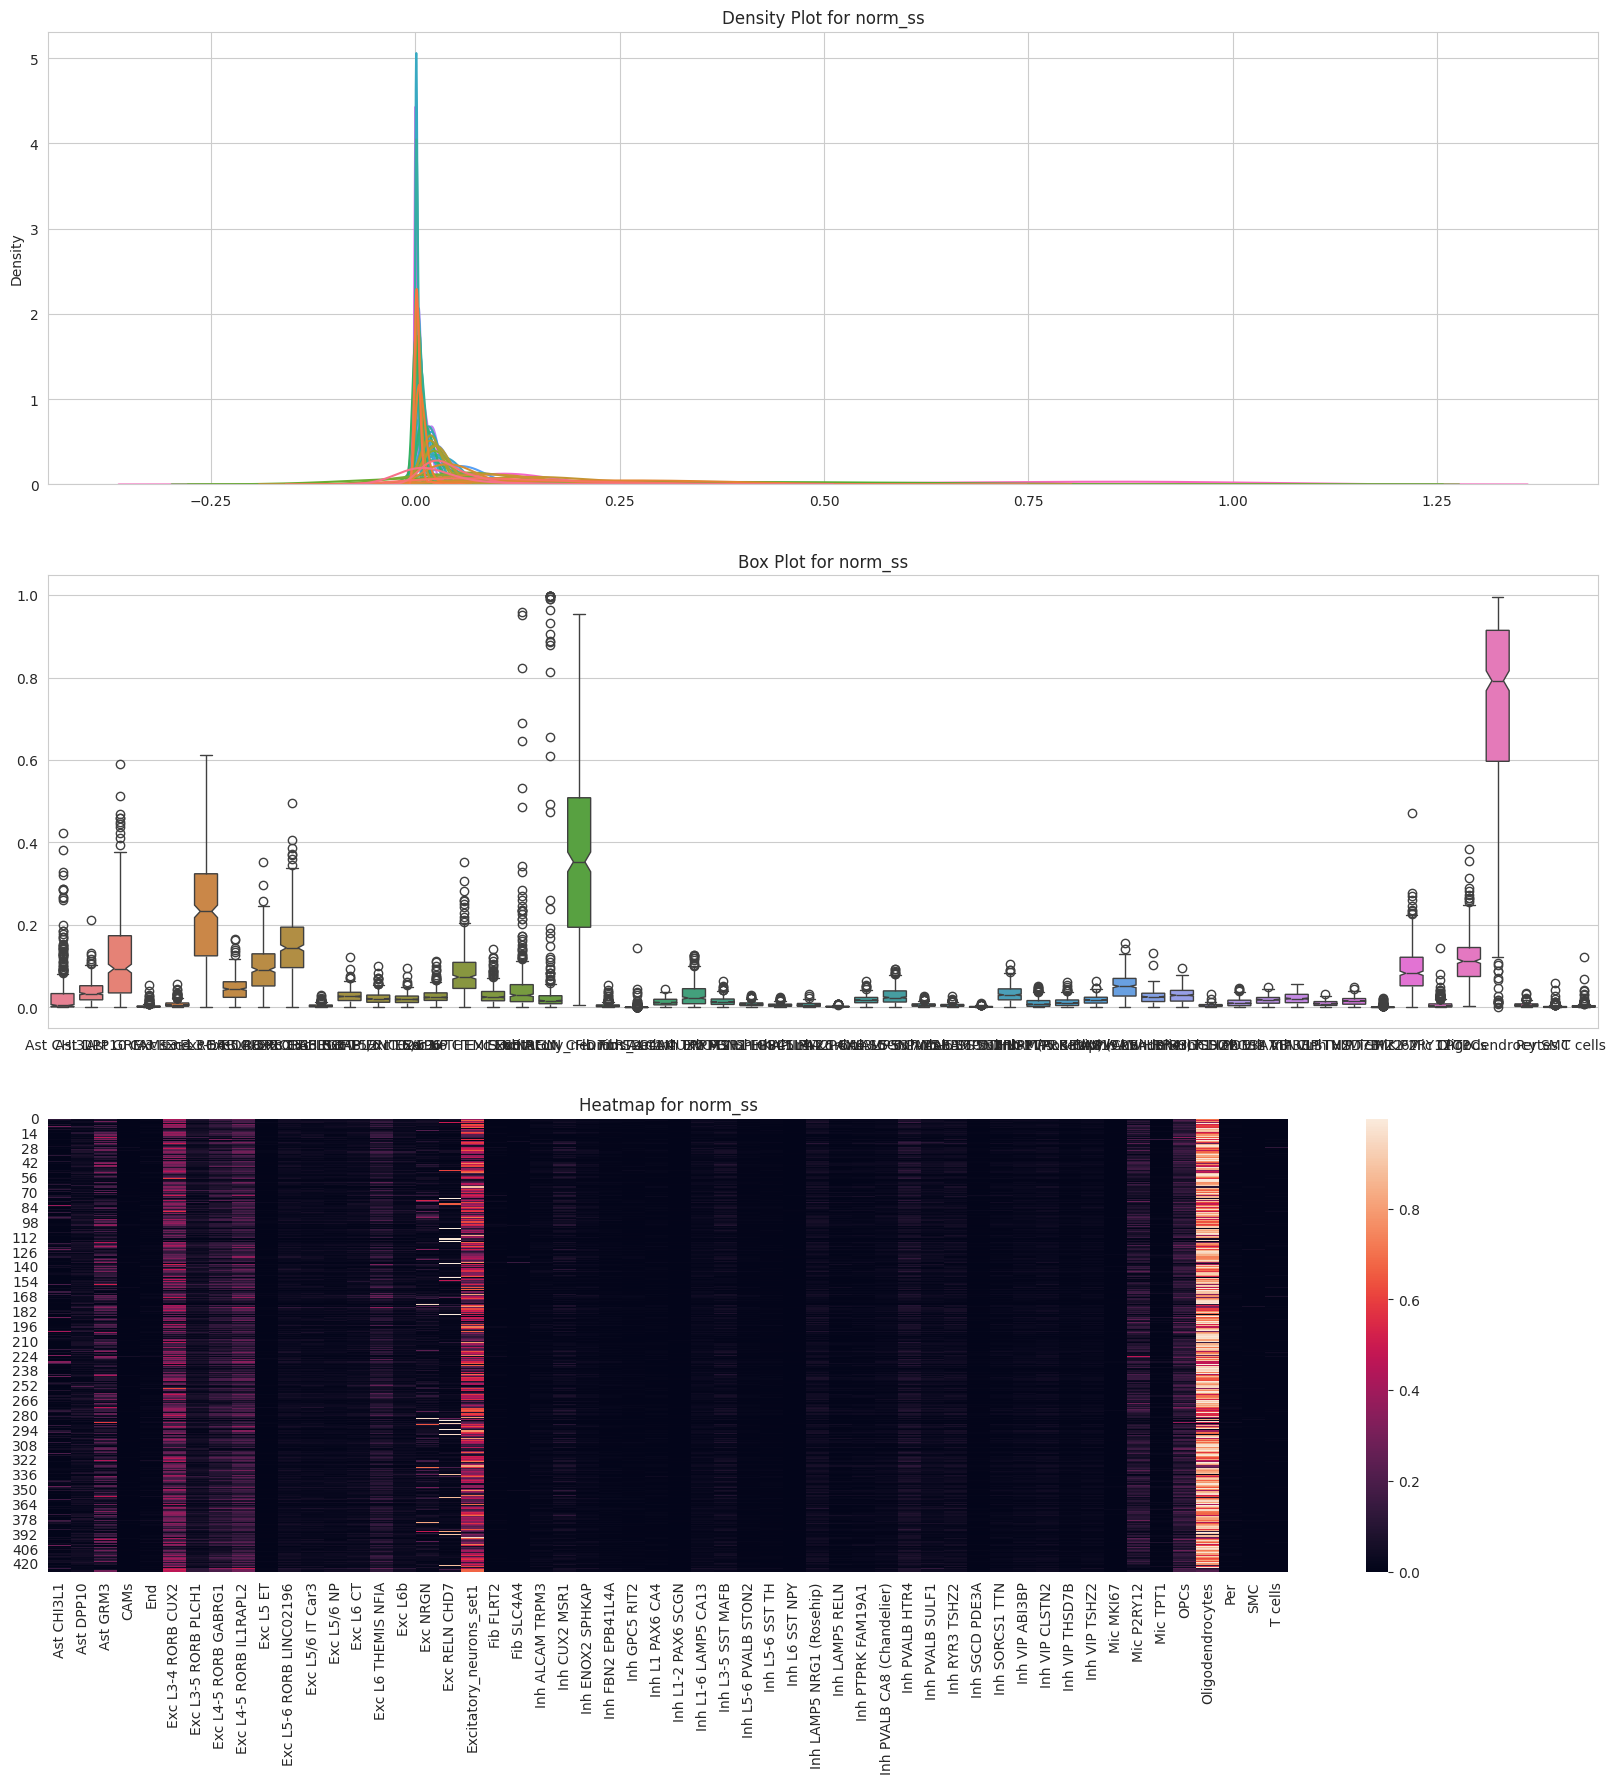

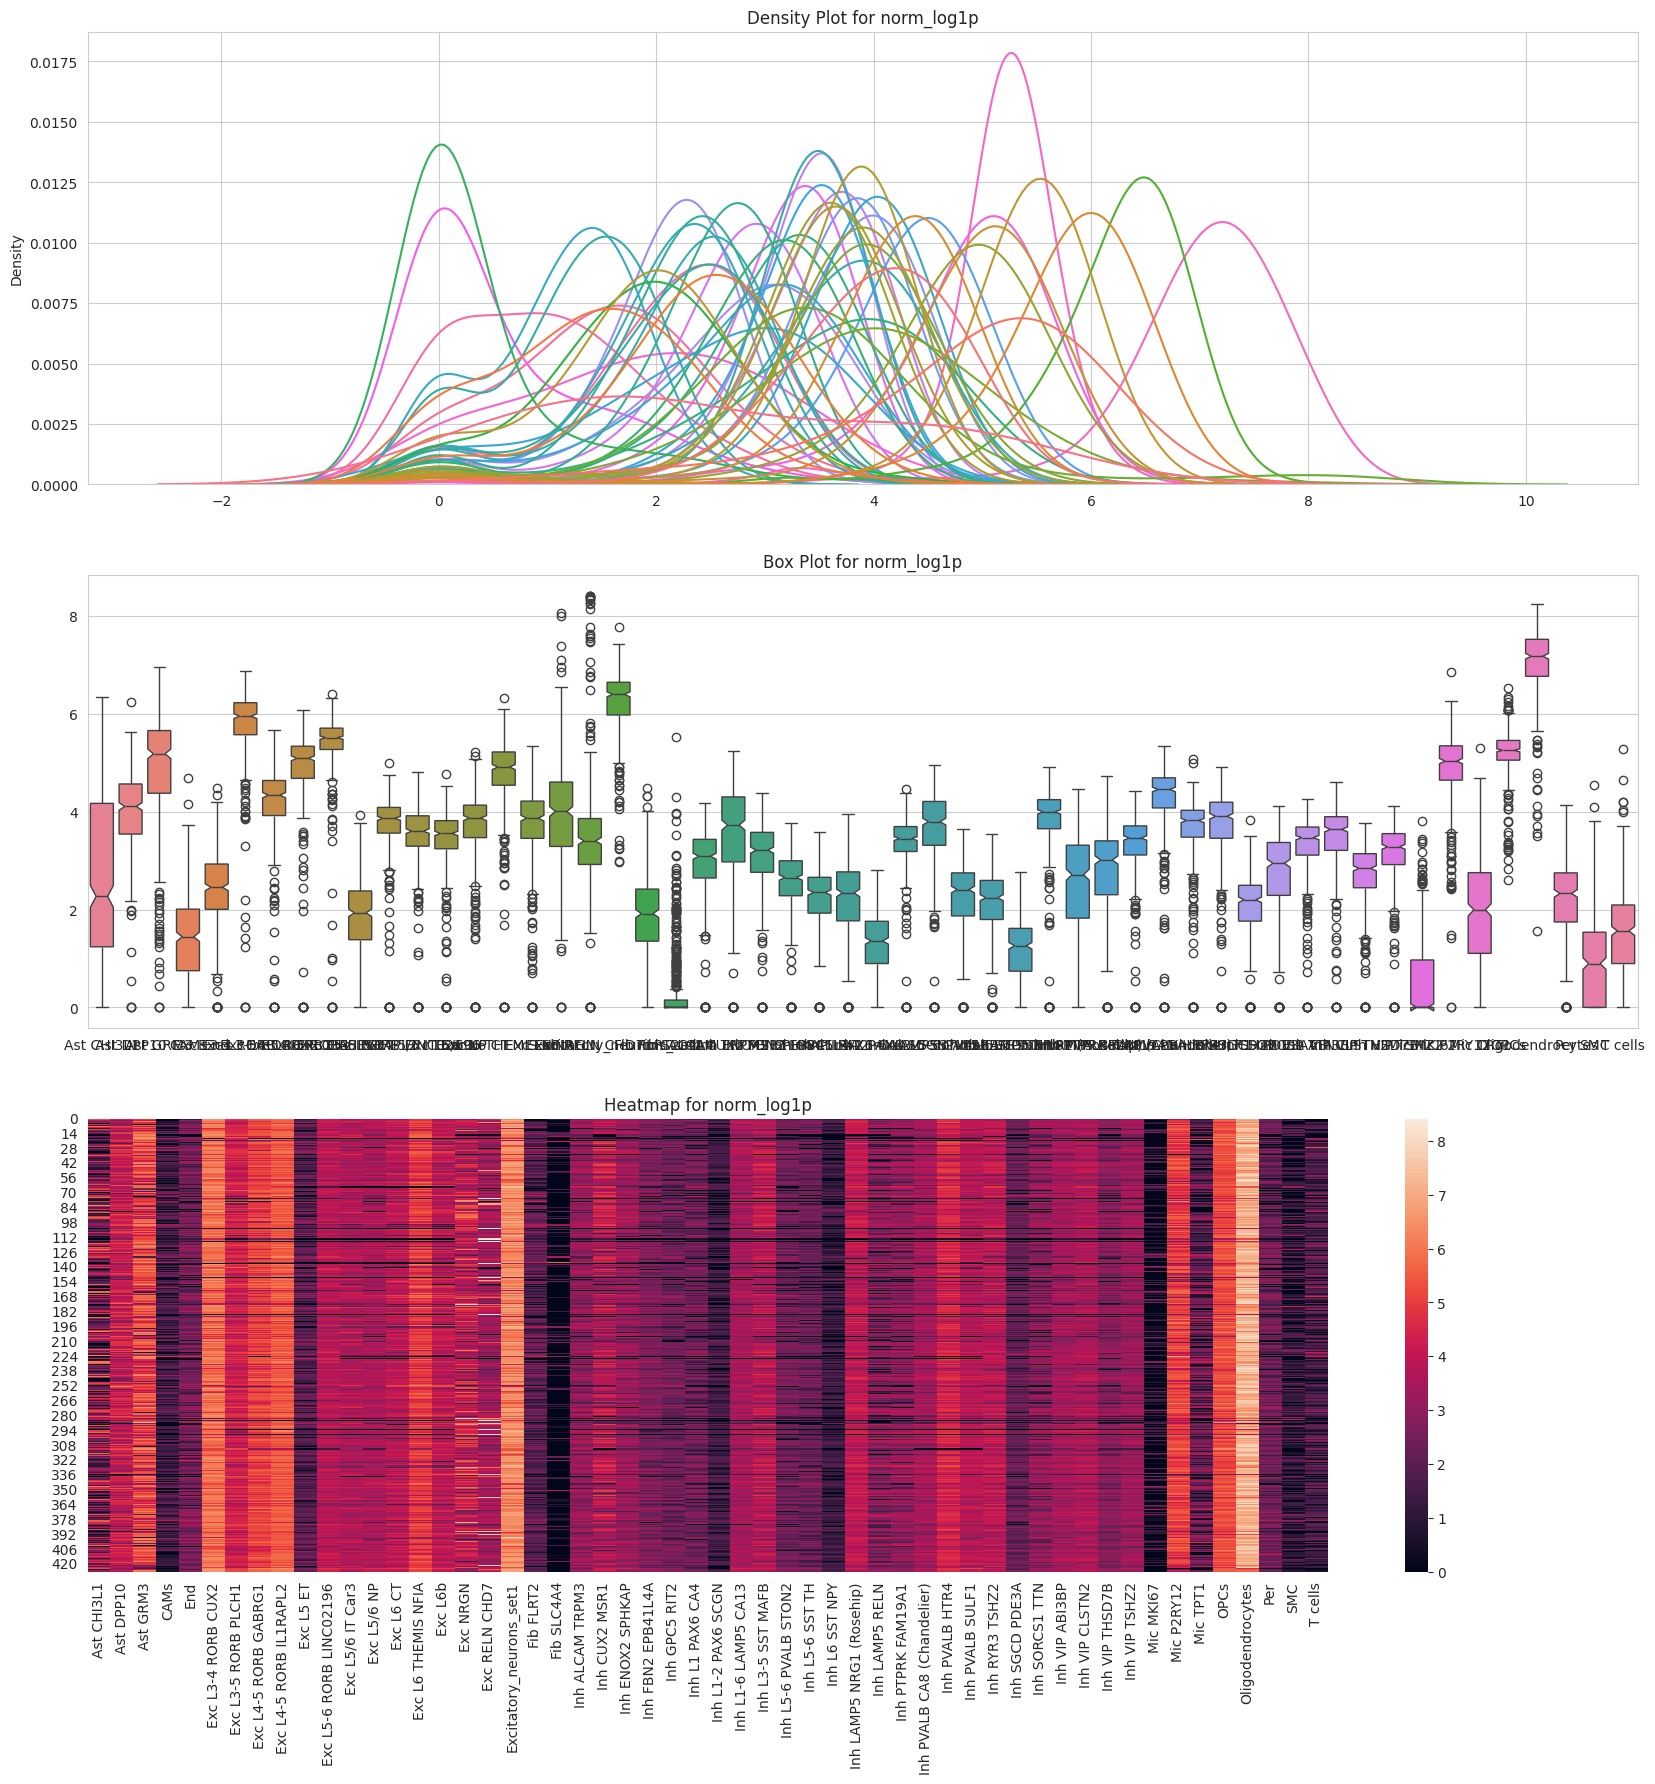

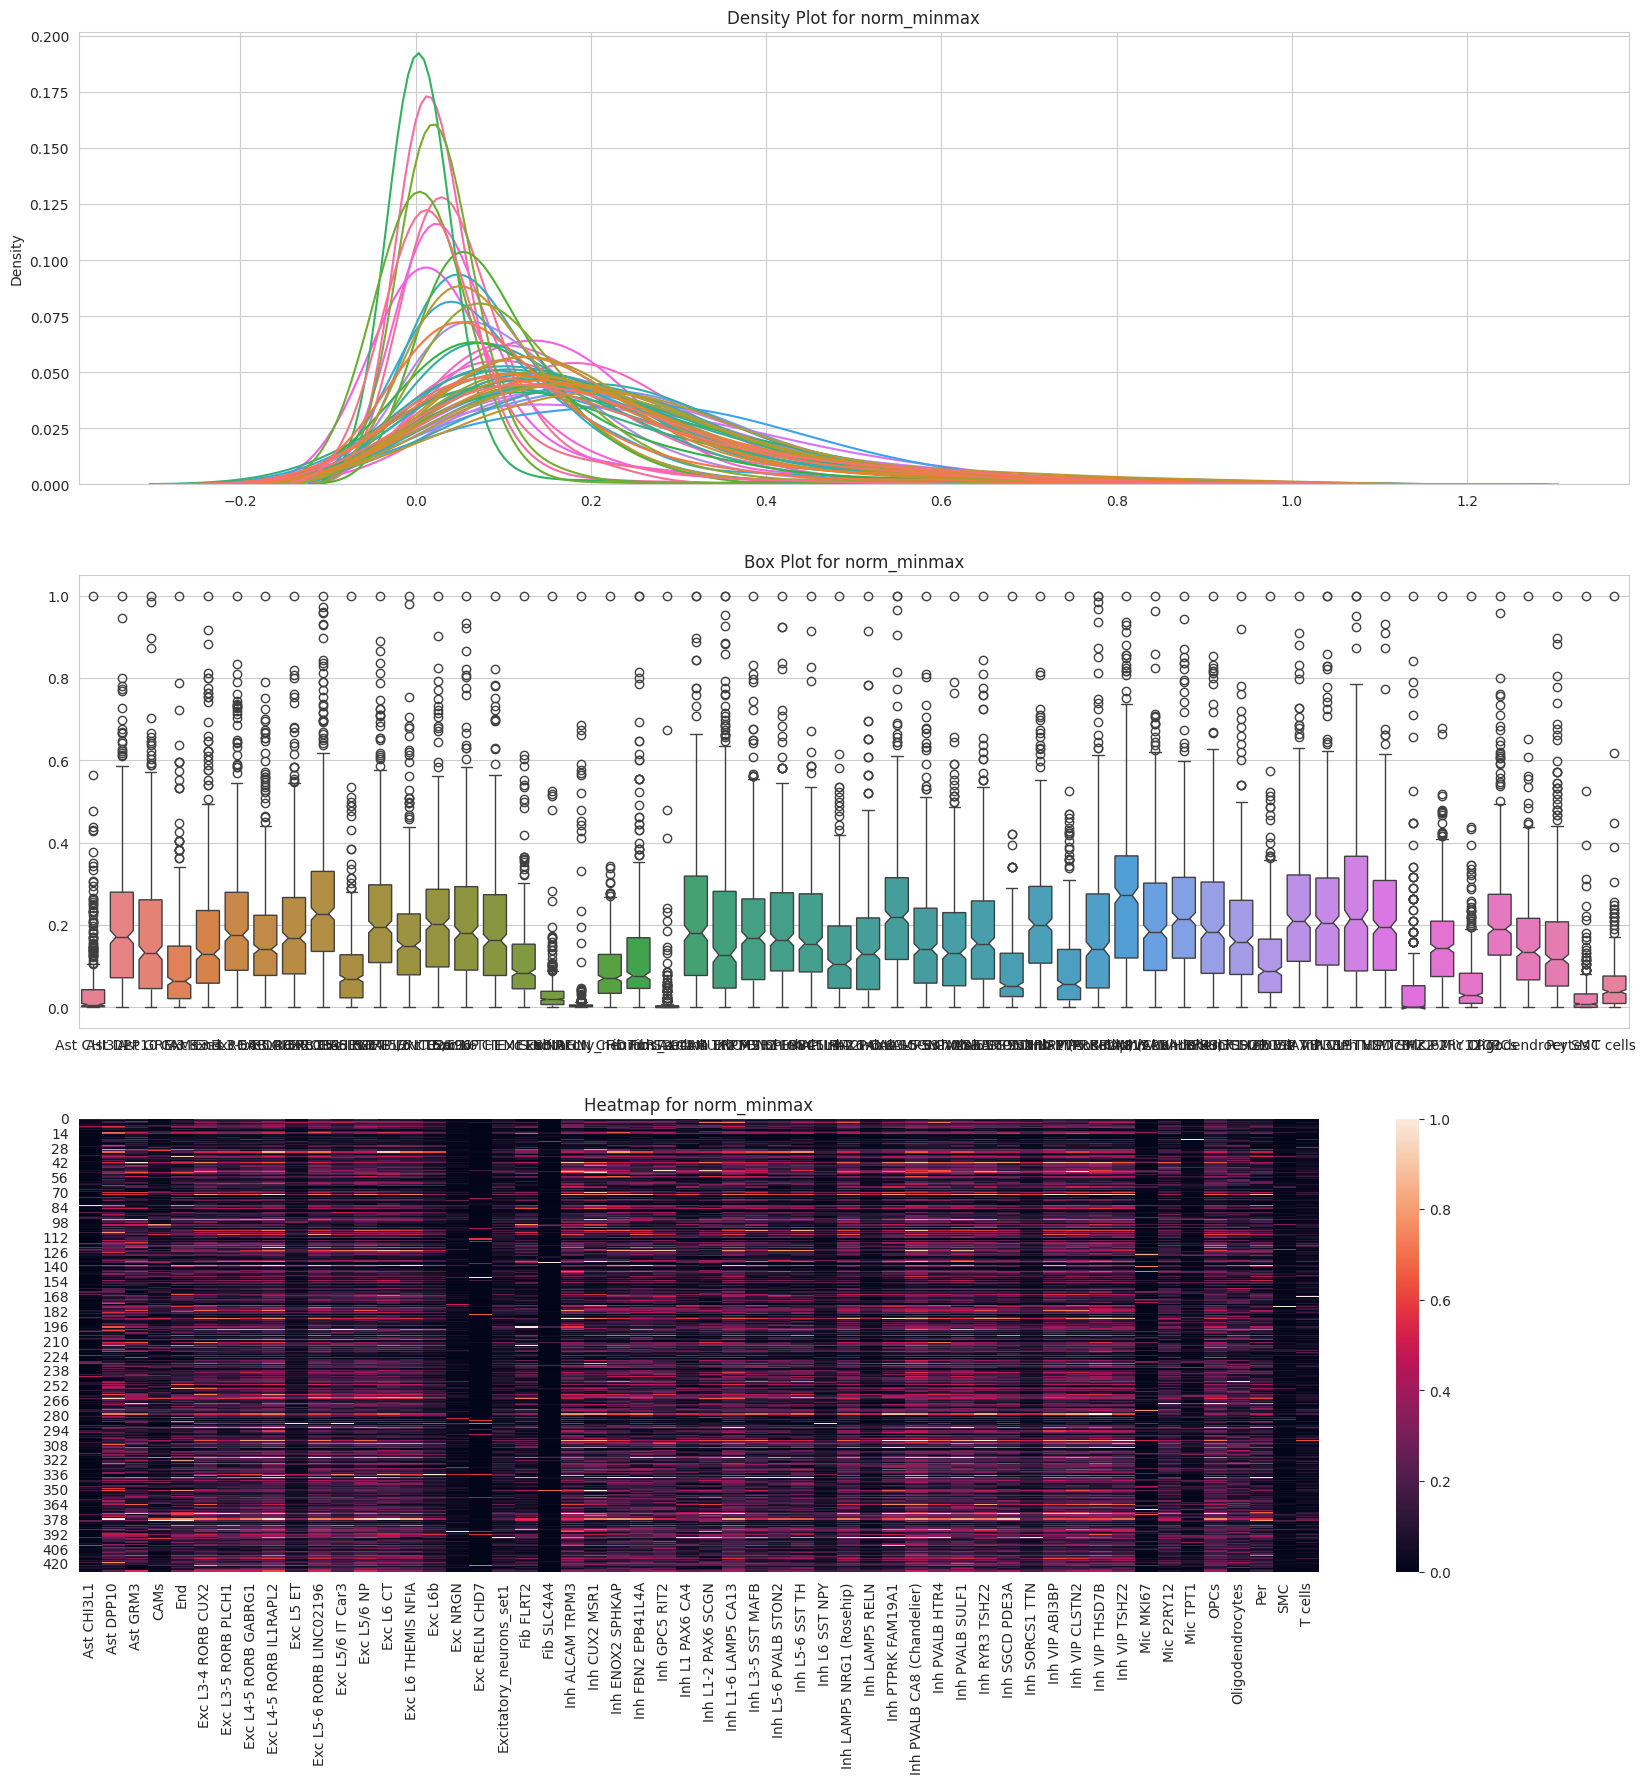

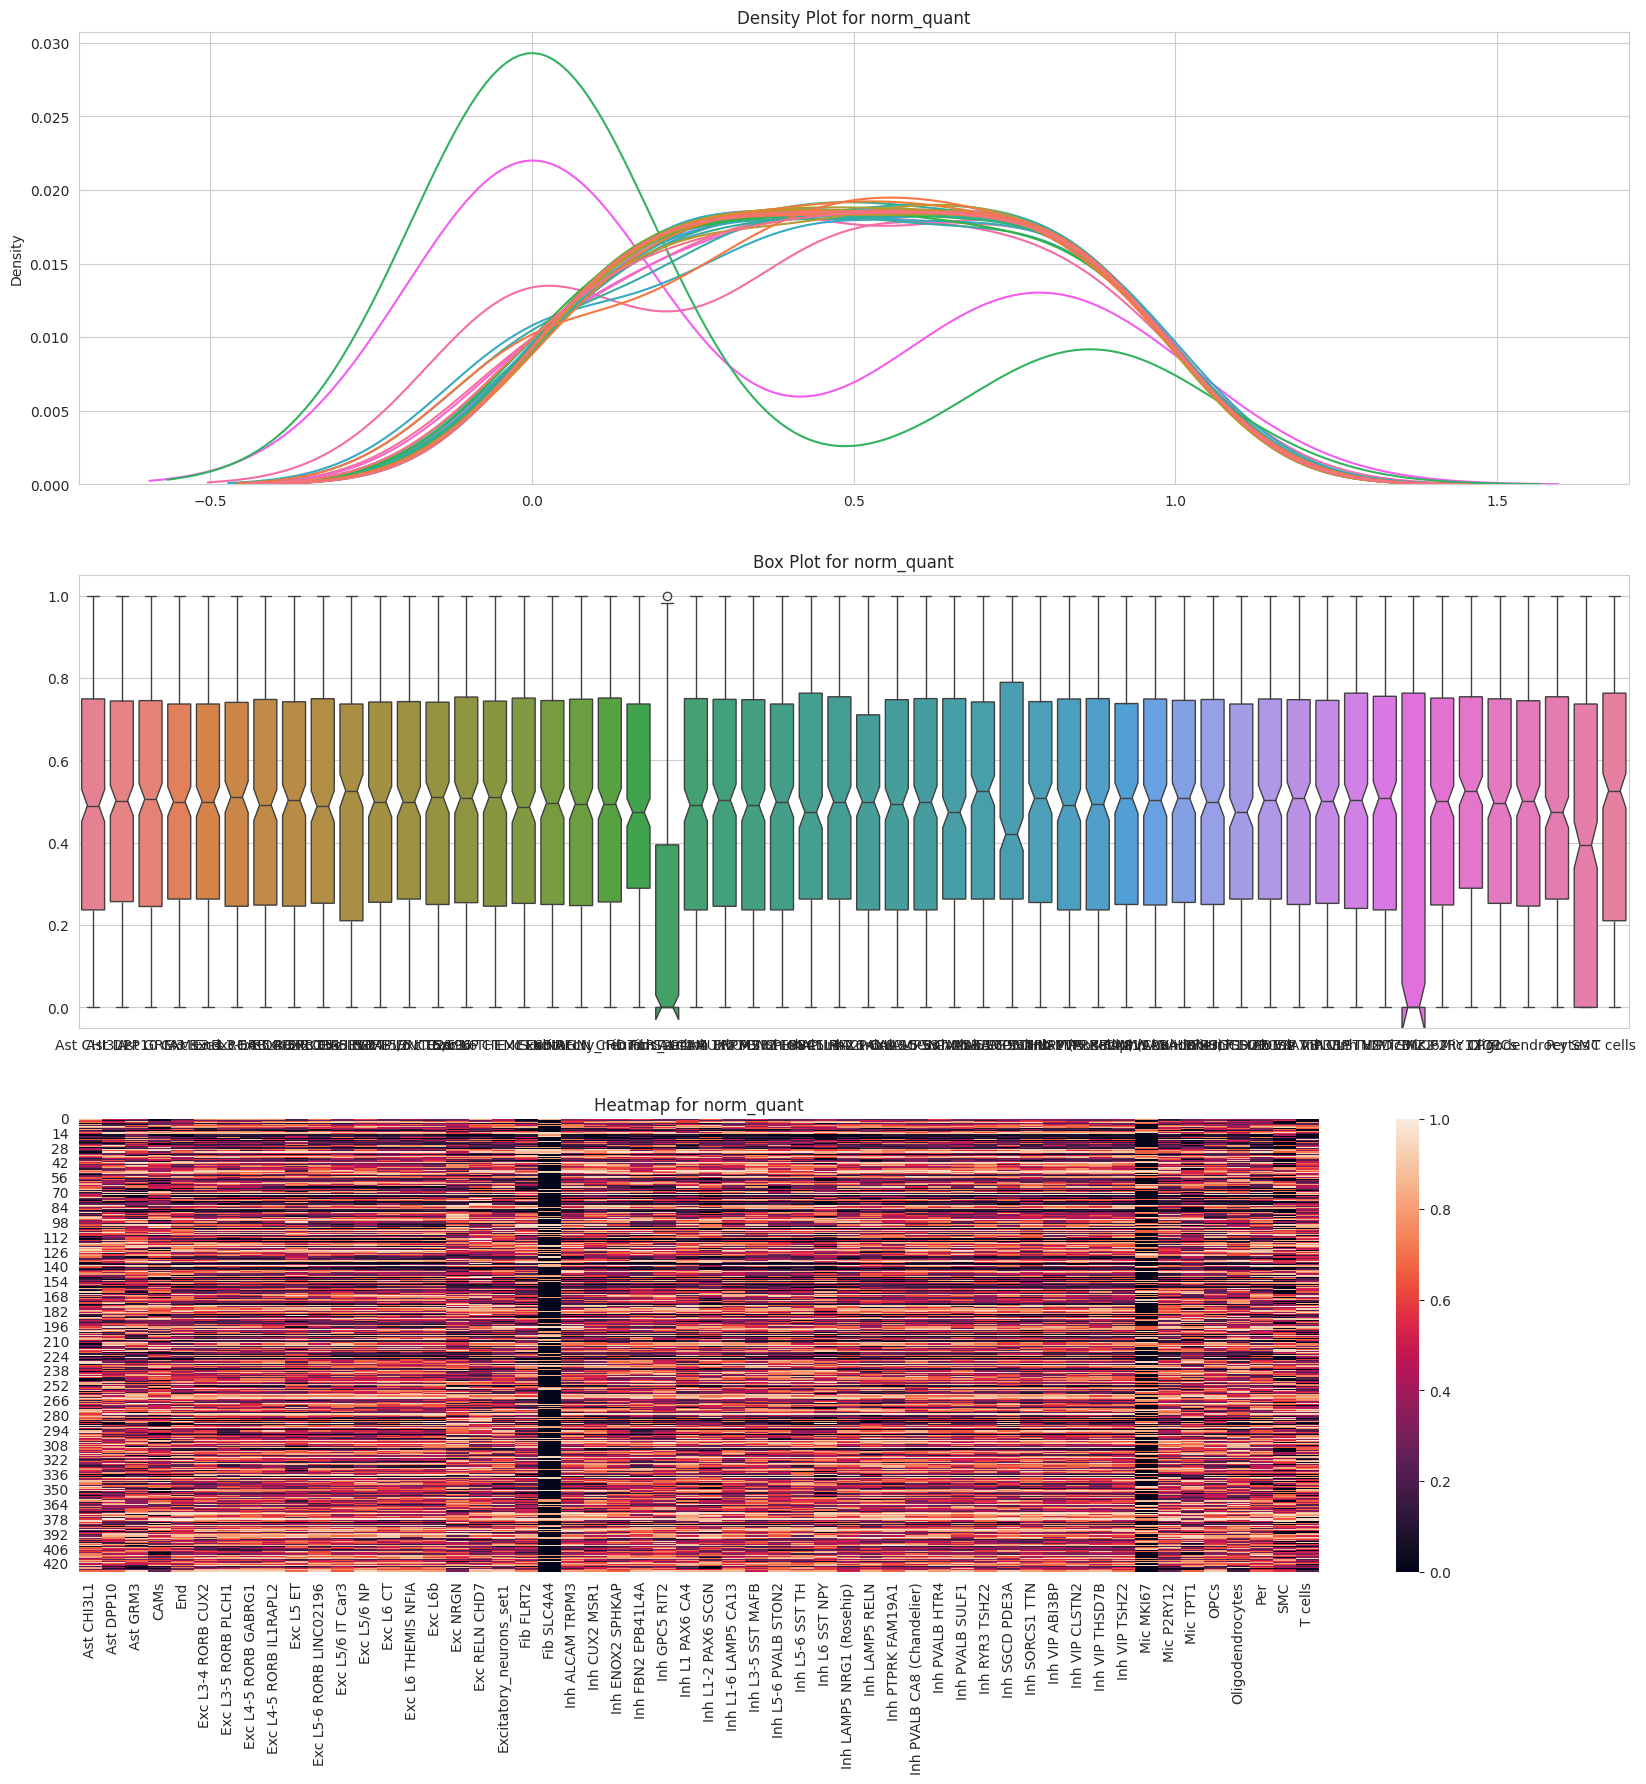

In [3]:
# Normalizations

from normalize import *
from norm_plots import *

normalizations: list[tuple] = [(normalize_unit, 'norm_ss'), 
                               (normalize_log1p, 'norm_log1p'),
                               (normalize_minmax, 'norm_minmax'), 
                               (normalize_quantile, 'norm_quant')]

generate_normalization_summary(ct_counts_metadata, 'X')

for func, layer in normalizations:
    func(ct_counts_metadata, layer)
    generate_normalization_summary(ct_counts_metadata, layer)